In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from random import shuffle
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils

## 다중 분류

- one hot encoding
    - 자동: compile(..., loss = "sparse_categorical_crossentropy)
    - 수동: compile(..., loss = "categorical_crossentropy)

## 당뇨병 데이터 샘플

In [17]:
data = np.loadtxt("C:\\Users\\ykk12\\Data\\diabetes.csv", delimiter=",")
print(data.shape)

X = data[:, 0:-1]
y = data[:, [-1]]

(759, 9)


## categorical_crossentropy

In [18]:
## one-hot encoding
y_one = tf.keras.utils.to_categorical(y, num_classes=2)
print(y.shape, y_one.shape)


AttributeError: module 'tensorflow' has no attribute 'keras'

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(8,)))
model.add(Dense(2, activation="softmax")) 

model.compile(loss="categorical_crossentropy",
              optimizer=SGD(), metrics=["accuracy"])

model.summary()

In [ ]:
model.fit(X, y_one, epochs=100, validation_split=0.2)

## sparse_categorical_crossentropy

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(8,)))
model.add(Dense(2, activation="softmax")) 

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=SGD(), metrics=["accuracy"])

model.summary()

In [ ]:
model.fit(X, y, epochs=100, validation_split=0.2)

## model 클래스

- Functional
- SubClassing

## 단순 선형 회귀

In [ ]:
X = [1,2,3,4,5,6]
y = [3,4,5,6,7,8]

model = tf.keras.models.Sequential()

model.add(Flatten(input_shape=(1,)))
model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))
model.summary()

In [ ]:
### Model() 사용

X = [1,2,3,4,5,6]
y = [3,4,5,6,7,8]

input_ = Input(shape=(1,))
output_ = Dense(1, activation="linear")(input_)

model = Model(inputs=input_, outputs=output_)

model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))
model.summary()

## 딥러닝

In [ ]:
X = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y = [[0],[0],[0],[1],[1],[1]]

model = tf.keras.models.Sequential()

model.add(Flatten(input_shape=(2,)))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
             metrics=["binary_accuracy"])
model.summary()

In [ ]:
### Model() 사용

X = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y = [[0],[0],[0],[1],[1],[1]]

input_ = Input(shape=(2,))
x = Dense(64, activation="sigmoid")(input_)
x = Dense(64, activation="sigmoid")(x)
output_ = Dense(1, activation="sigmoid")(x)

model = Model(inputs=input_, outputs=output_)

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
             metrics=["binary_accuracy"])
model.summary()

## 복잡한 모델

입력층1(노드4개) - 은닉층1(노드8개) - 은닉층2(노드 16개)

입력층2(노드8개) - 은닉층3(노드8개)

출력층(노드 10개)

In [ ]:
### 입력층1에 대한 신경망 모델

input_1 = Input(shape=(4,))

hidden_1 = Dense(8, activation="relu")(input_)
hidden_2 = Dense(16, activation="relu")(hidden_1)

output_1 = Model(inputs=input_1, outputs=hidden_2)

## 3. 실습1: MNIST

#### Data Definition

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape, X_test.shape)

#### 모델 설계 및 학습

- hidden layer: 3개
- 노드 수: 64개

In [ ]:
input_= Input(shape=(28,28))
x1= Dense(64, activation='linear')(input_)
x2= Dense(64, activation='linear')(x1)
output_= Dense(1, activation='softmax')(x2)

model=Model(inputs=input_, outputs=output_)
model.summary()

In [ ]:
### one-hot encoding
import tensorflow.keras.utils as utils

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [ ]:
y_test[0]

In [ ]:
model = Sequential()

model.add(Flatten(input_shape(28,28)))

model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
             metrics=["binary_accuracy"])
model.summary()

## 평가

In [ ]:
model.evaluate(X_test, y_test, batch_size=32)

In [ ]:
## 예측

In [ ]:
rand_num = np.random.choice(10000, 10)
rand_num

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import numpy as np

from tensorflow.keras.callbacks import TensorBoard

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import SGD

In [22]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

### one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### 차원 변경
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

### 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Validation : validation_data
s = np.arange(len(X_train))
np.random.shuffle(s)

X_train = X_train[s]
y_train = y_train[s]

X_val = X_train[:10000]
X_train = X_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

model = Sequential()

model.add(Flatten(input_shape=(28*28,)))

model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()

## TensorBoard 설정
# tf_hist = tf.keras.callbacks.TensorBoard(log_dir="./graph")

## EarlyStopping
# tf_stop = tf. keras.callback.Early Stopping(monitor="val_loss", patience=5)

## ModelCheckpoint
# tf_chk = tf.keras.callback.ModelCheckpoint("", monitor="val_loss", save_best_only=True)

# 학습
result = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val) #, callbacks=[tf_hist])

# 평가
model.evaluate(X_test, y_test, batch_size=32)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


AttributeError: module 'tensorflow' has no attribute 'keras'

In [24]:
#### 모델저장

# model.save("")

In [25]:
#### 모델 불러오기

# model2 = load_model("")

## Version4

- callback 종류
    - EarlyStopping
        - 모델 성능 지표가 설정한 epoch동안 개선되지 않을 때 조기 종료
        - EarlyStopping(monitor="val_loss", "min_delta=0", "patience=0")
            - monitor: 관찰하고자 하는 값, 주로 val_loss나 val_acc가 사용됨
            - min_delta: 개선되고 있다고 판단하기 위한 최소 변화량
    - ModelCheckpoint
        - 모델이 학습하면서 정의한 조건을 만족했을때, model의 weight값을 중간 저장
        - save_best_only=True: 가장 성적이 좋을때 파일로 저장
        - ModelCheckpoint(filepath, monitor: str = "var_loss", save_best_only: bool= False)
            - save_best_only=True: 가장 서억이 좋을 때 파일로 저장
    - ReduceLROnPlateau
        - 모델의 성능 개선이 없을 경우, 학습률(learning_rate)를 조절해 모델의 개선을 유도함
        - ReducelROnPlateau(monitor="val_loss", factor=0.1, patience=10)
            - factor: 0.5로 했을 경우 learning_rate를 절반 수준으로 조정
        

## Version5

- 가중치 초기화
- Drop Out

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

### one-hot encoding

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

### 차원 변경
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1,784)

### 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Validation : validation_data
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
# print(X_train.shape, X_val.shape)
s = np.arange(len(X_train))
np.random.shuffle(s)

X_train = X_train[s]
y_train = y_train[s]

X_val = X_train[:10000]
X_train = X_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

model = Sequential()

model.add(Flatten(input_shape=(28*28,)))

model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(0.2))


model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()

### Tensorboard 설정
# tf_hist = tf.keras.callbacks.TensorBoard(log_dir='./graph', write_images=True)

### EarlyStopping
tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

### ReduceLROnPlateau
# tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

### ModelCheckpoint
# tf_chk = tf.keras.callbacks.ModelCheckpoint('data/modelchk_test.h5', monitor='val_loss', save_best_only=True)

### 학습
result = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val,y_val), callbacks=[tf_stop])

# # 평가
# model.evaluate(X_test, y_test, batch_size=32)

## 실습2: Fashion MNIST

#### Data Definition

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


#### 데이터 소개

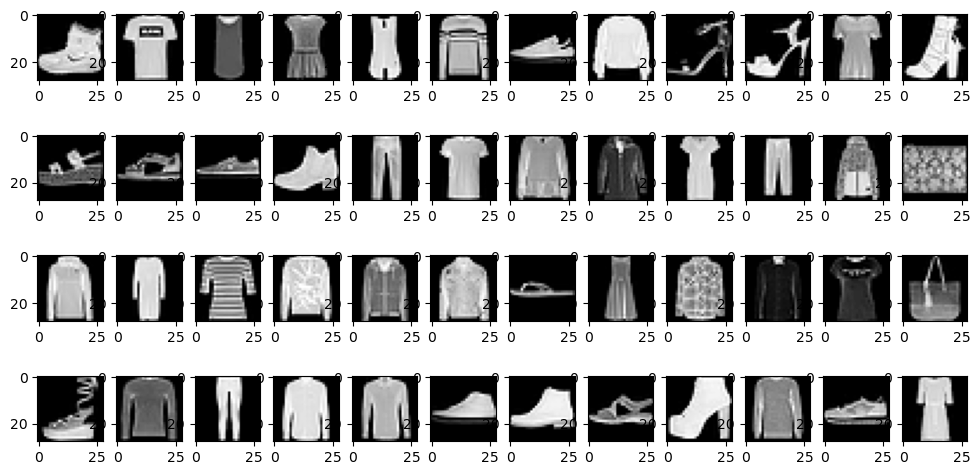

In [7]:
plt.figure(figsize=(12,6))

for idx in range(48):
    plt.subplot(4, 12, idx+1)
    plt.imshow(X_train[idx], cmap="gray")
    

1. 기본 세팅값으로 점수와 그래프 확인
2. 정규화와 원핫 인코딩
3. hidden layer 와 노드수 추가
4. validation(validation_data, validation_split)
5. learning rate
    - 기본값
    - 0.1
6. Optimizer
    - Adam
    - SGD
7. tensorboard를 이용한 그래프 확인
8. callback 함수사용
9. 가중치 초기화, Dropout 사용했을 때 전후 성능 비교
    

In [ ]:
### one-hot encoding

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
model = Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()

result = model.fit(X_train, y_train, epochs=20, batch_size=32)

## Data shuffling

In [ ]:
s= np.arange(len(X_train))
print(s)

np.array.shuffle(s)
print(s)

X_train = X_train[s]
y_train = y_train[s]

In [20]:
VAL_SPLIT_RATIO = 0.15

val_nums = int(VAL_SPLIT_RATIO * len(X_train))
print("val_nums: ", val_nums)

X_val = X_train[:val_nums]
y_val = y_train[:val_nums]

X_train = X_train[val_nums:]
y_train = y_train[val_nums:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

val_nums:  9000
(51000, 28, 28) (51000, 10)
(9000, 28, 28) (9000, 10)


## 정규화

In [21]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

print(X_train[0].max(), X_train[0].min())
print(X_test[0].max(), X_test[0].min())
print(X_val[0].max(), X_val[0].min())

1.0 0.0
1.0 0.0
1.0 0.0


## one-hot encoding

In [23]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
y_val = utils.to_categorical(y_val, 10)

In [24]:
print(y_train[0])
print(y_test[0])

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0

## 모델 구축

In [25]:
model = Sequential()

model.add(Flatten(input_shape=(28,28,1)))

model.add(Dense(50,activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [26]:
from datetime import datetime

start = datetime.now()

result = model.fit(X_train, y_train, epochs=20, batch_size=32)

ValueError: Error when checking input: expected flatten_1_input to have 4 dimensions, but got array with shape (51000, 28, 28)

## 평가 및 시각화

In [27]:
model.evaluate(X_test, y_test)

ValueError: Error when checking input: expected flatten_1_input to have 4 dimensions, but got array with shape (10000, 28, 28)

In [28]:
plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label= 'validation_loss')
plt.legend(loc='best')

plt.title('ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(result.history['accuracy'], label='train_accuracy')
plt.plot(result.history['val_accuracy'], label= 'validation_accuracy')
plt.legend(loc='best') (

SyntaxError: unexpected EOF while parsing (919491517.py, line 17)

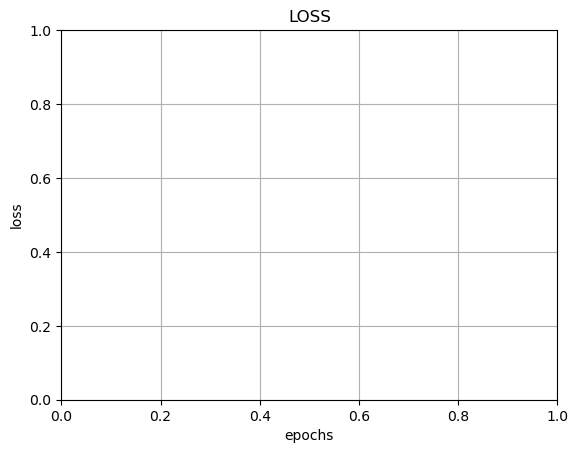

In [29]:
plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

KeyError: 'val_loss'

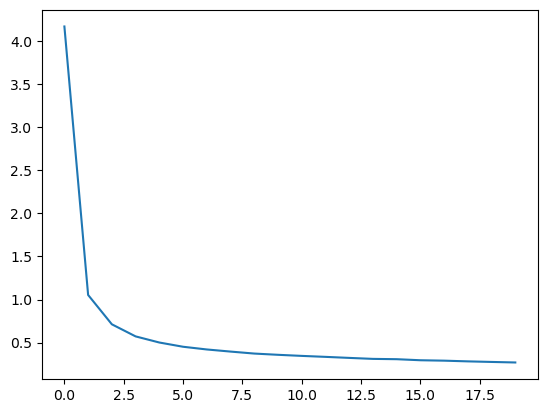

In [30]:
plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label= 'validation_loss')
plt.legend(loc='best')